# Notes

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
import os
from astropy.timeseries import BoxLeastSquares

plt.rcParams['font.family']='serif'
plt.style.use('ggplot')

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

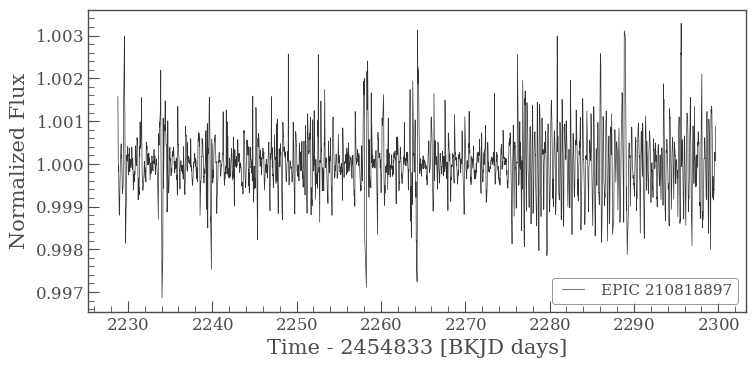

In [14]:
search_result = lk.search_lightcurve('K2-309', author='K2', cadence='long')
lc_collection = search_result.download_all()

lc = lc_collection.stitch().flatten(window_length=31).remove_outliers()
lc.plot()

In [18]:
fluxes = lc.flux
times = lc.time
errs = lc.flux_err 

[2228.82084456 2228.84127696 2228.86170937 ... 2299.61697151 2299.63740315
 2299.67826643]


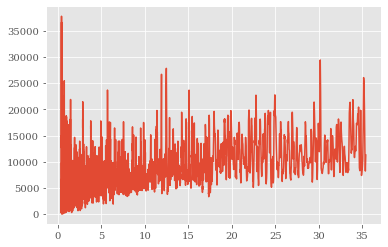

In [22]:
periods = np.random.uniform(0, 30, 10000)
model = BoxLeastSquares(times, fluxes, errs)
periodogram = model.autopower(0.2)

powers = periodogram.power
periods = periodogram.period

plt.plot(periods, powers) 

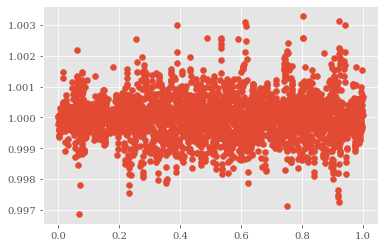

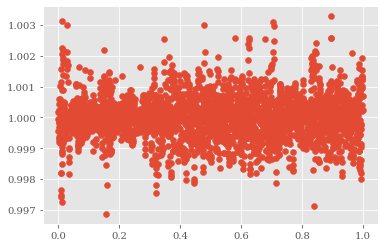

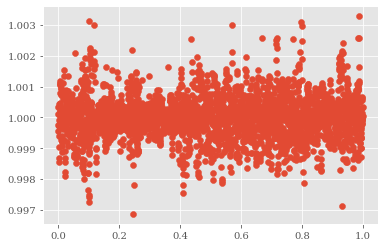

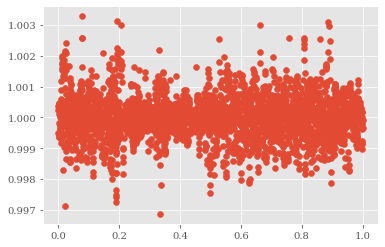

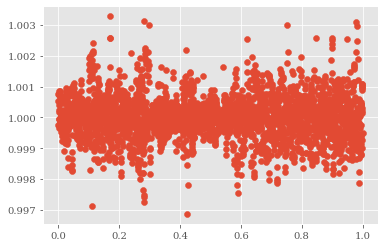

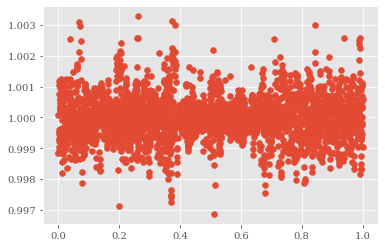

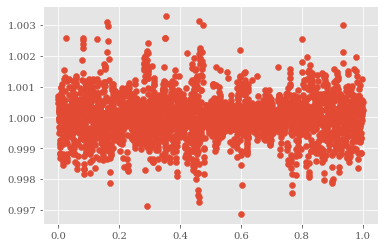

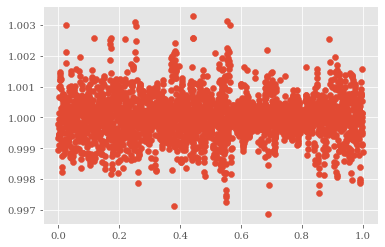

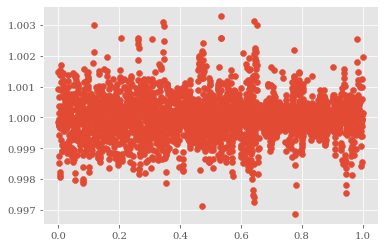

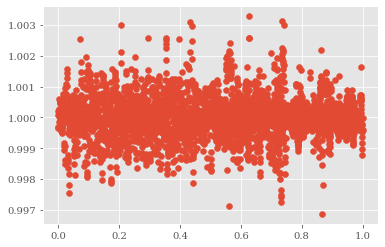

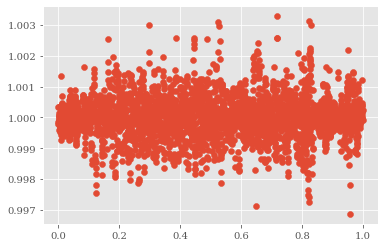

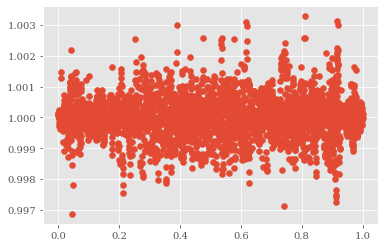

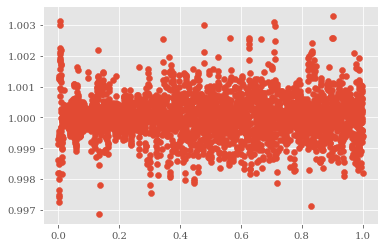

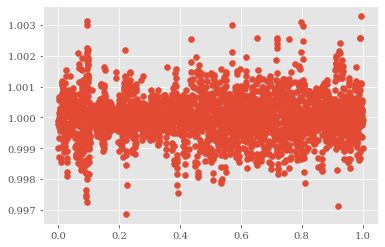

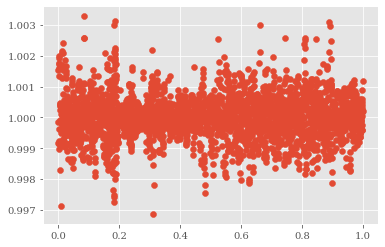

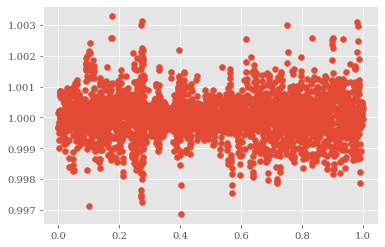

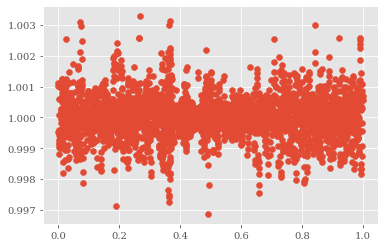

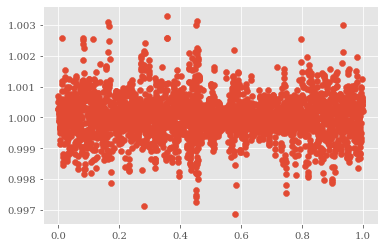

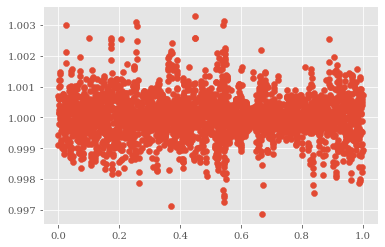

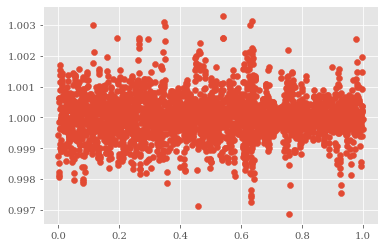

In [25]:
sort_idx = np.argsort(periods)[::-1]

sorted_powers = powers[sort_idx]
sorted_periods = periods[sort_idx]

#times = np.array(times).astype(float)

for i in sorted_periods[0:20]: 
    


    phased_dates = np.mod(times.value, i.value)/i.value
    
    plt.scatter(phased_dates, fluxes)
    plt.show()
    plt.clf()
    plt.close()
